In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
data[data.price == 0]['price'].count()

49

In [ ]:
data=data[data.price != 0]

In [ ]:
from scipy.stats import zscore
# Remove outliers
data['price_zscore'] = zscore(data['price'])
data = data[(data.price_zscore < 3) & (data.price_zscore > -3)]

<ipython-input-111-f63648207d39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_zscore'] = zscore(data['price'])


In [ ]:
data.drop(columns=['price_zscore'], inplace=True)

In [ ]:
data.country.nunique()

data[data['statezip'].str[0:2] != 'WA']


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [ ]:
data.city.nunique()

data.drop(columns=["country", "statezip","street",'date'], inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
px.bar(
    x=data.bedrooms.value_counts().index,
    y=data.bedrooms.value_counts().values,
    labels={"x": "Number of Bedrooms", "y": "Number of Houses"},
    title="Number of Bedrooms with Number of Houses",
    color= data.bedrooms.value_counts().index
)

In [ ]:
px.bar(
    x=data.bathrooms.value_counts().index,
    y=data.bathrooms.value_counts().values,
    labels={"x": "Number of Bathrooms", "y": "Number of Houses"},
    title="Number of Bathrooms with Number of Houses",
    color=data.bathrooms.value_counts().index
)

In [ ]:
px.scatter(
    data,
    y="sqft_living",
    x="price",
    title="Living Square Footage vs Price",
)

In [ ]:
px.scatter(
    data,
    y="sqft_lot",
    x="price",
    title="Lot Square Footage vs Price",
)


In [ ]:
px.bar(
    x=data.floors.value_counts().index,
    y=data.floors.value_counts().values,
    labels={"x": "Number of Floors", "y": "Number of Houses"},
    title="Number of Floors with Number of Houses",
    color=data.floors.value_counts().index,
)

In [ ]:
px.pie(
    data,
    names={'0' : 'No Waterfront', '1' : 'Waterfront'},
    values=data.waterfront.value_counts().values,
    title="Houses with Waterfront",
)

In [ ]:
px.bar(
    x=data.view.value_counts().index,
    y=data.view.value_counts().values,
    labels={"x": "View", "y": "Number of Houses"},
    title="View with Number of Houses",
    color=data.view.value_counts().index,
)

In [ ]:
px.bar(
    x=data.condition.value_counts().index,
    y=data.condition.value_counts().values,
    labels={"x": "Condition", "y": "Number of Houses"},
    title="Condition with Number of Houses",
    color=data.condition.value_counts().index,
)

In [ ]:
px.scatter(
    data,
    y="sqft_above",
    x="price",
    title="Above Square Footage vs Price",
)

In [ ]:
px.scatter(
    data,
    y="sqft_basement",
    x="price",
    title="Basement Square Footage vs Price",
)

In [ ]:
px.bar(
    x=data.yr_built.value_counts().index,
    y=data.yr_built.value_counts().values,
    labels={"x": "Year Built", "y": "Number of Houses"},
    title="Year Built with Number of Houses",
    color=data.yr_built.value_counts().index,
)

In [ ]:
px.bar(
    x=data.city.value_counts().index,
    y=data.city.value_counts().values,
    labels={"x": "City Built", "y": "Number of Houses"},
    title="City with Number of Houses",
    color=data.city.value_counts().index,
)

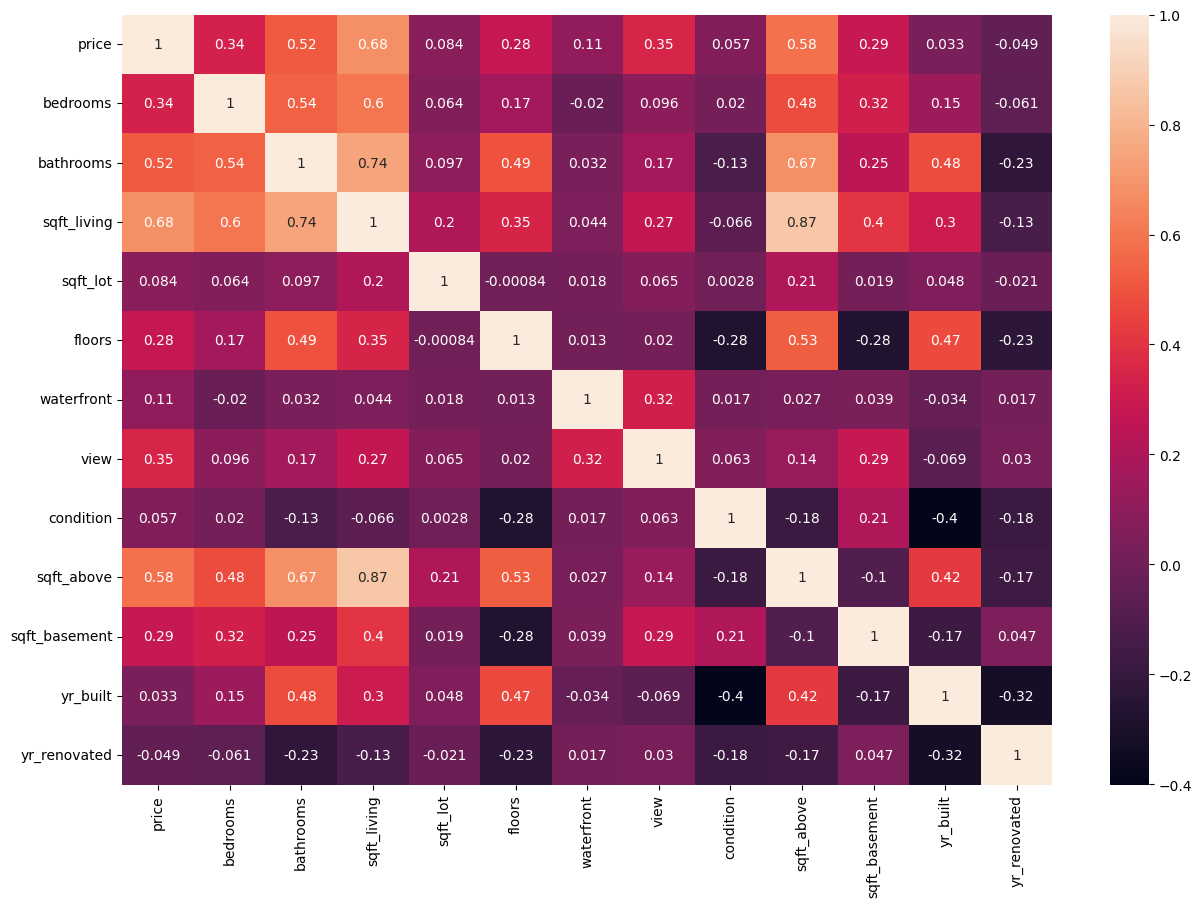

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True);

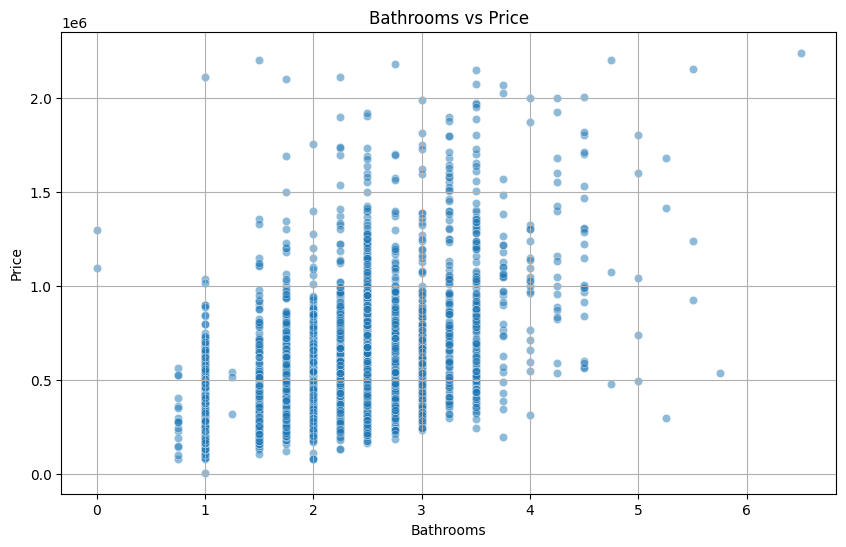

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=data, alpha=0.5)
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

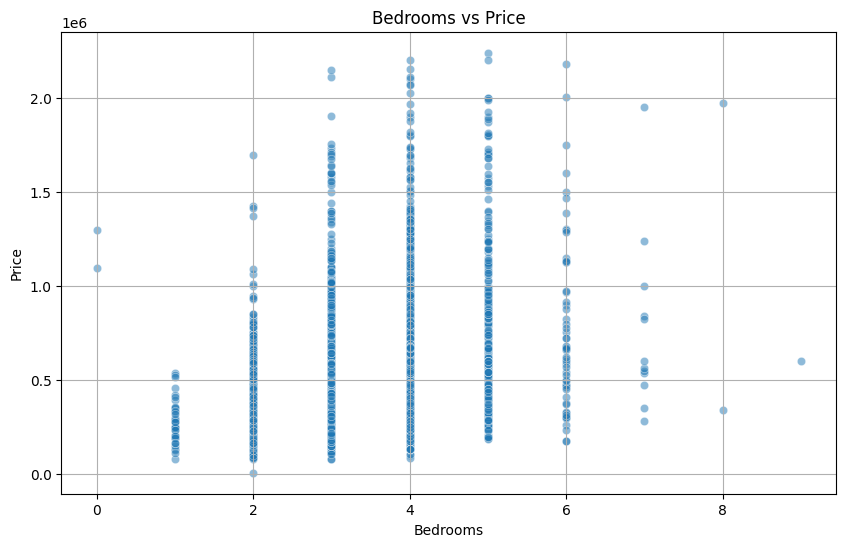

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data, alpha=0.5)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
# Select relevant columns
selected_features = ['price','bedrooms','bathrooms','sqft_living']
data = data[selected_features]

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living
0,313000.0,3.0,1.50,1340
2,342000.0,3.0,2.00,1930
3,420000.0,3.0,2.25,2000
4,550000.0,4.0,2.50,1940
5,490000.0,2.0,1.00,880


In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Create and train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Take input from the user
bathrooms = float(input("Enter the number of bathrooms: "))
bedrooms = float(input("Enter the number of bedrooms: "))
living_rooms = float(input("Enter the number of living rooms: "))

# Create a DataFrame with feature names
user_input_df = pd.DataFrame([[bathrooms, bedrooms, living_rooms]], columns=X_train.columns)

# Use the trained model to predict the price
predicted_price = linear_reg_model.predict(user_input_df)

print(f"Predicted Price using Linear Regression: {predicted_price[0]}")
#3.0	1.50	1340

Enter the number of bathrooms: 3.0
Enter the number of bedrooms: 1.50
Enter the number of living rooms: 1340
Predicted Price using Linear Regression: 349936.2593409041
